In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tftb
import scipy.signal as sig

from utils.preprocessing import load_data,center_data
from utils.plotting import plot_single, plot_setup

In [ ]:
df = load_data('./data/GeoMag Odessa-Finland/01-Jun-2018 Nurmijarvi GeoMag.txt')

target_value = 99999
by = df['By'].values.copy()
mask = np.isclose(by, target_value)
new_by = by.copy()
avg_neighbors = (by[:-2] + by[2:]) / 2
replacement_indices = np.where(mask[1:-1])[0] + 1
new_by[replacement_indices] = avg_neighbors[mask[1:-1]]
df['By'] = new_by

df['y_centered'] = center_data(df.By)
myfigsize = (14,4)
df.shape

(86400, 3)

c:\Users\Admin\diploma\utils\plotting.py:202: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


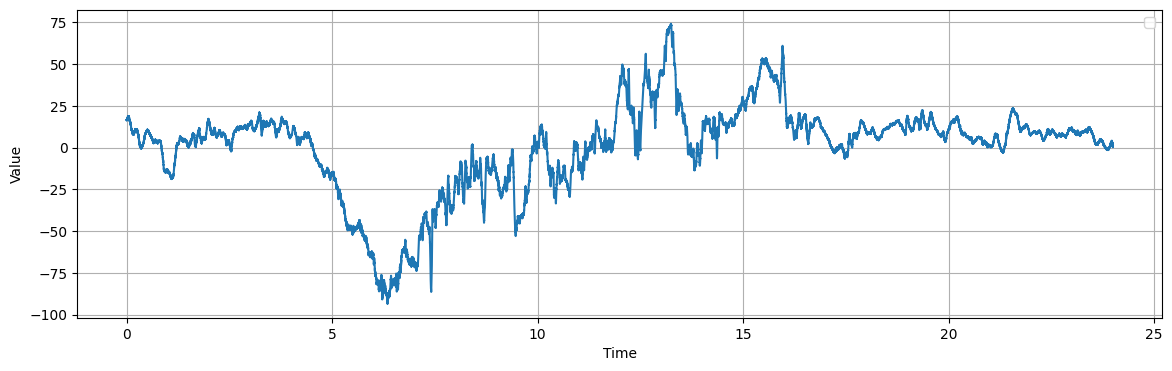

In [18]:
interval = slice(0, -1)
plt.figure(figsize=myfigsize)
plt.plot(df.Time[interval], df.y_centered[interval])
plot_setup()


In [41]:
T = df.Time.to_numpy()[-1] - df.Time.to_numpy()[0]
dt = 1/(60*60*24)
freq_s = 1/dt  

sr = 400
domain = np.array(df.Time)[::sr]
signal = np.array(df.y_centered)[::sr]

прямое и попробовать псевдо ...

преобразование гильберта для огибающих узкополосных сигналов

скелетон -- для 3д спектрограм

зануляют все коеффы, кроме максимальных

<Figure size 1400x400 with 0 Axes>

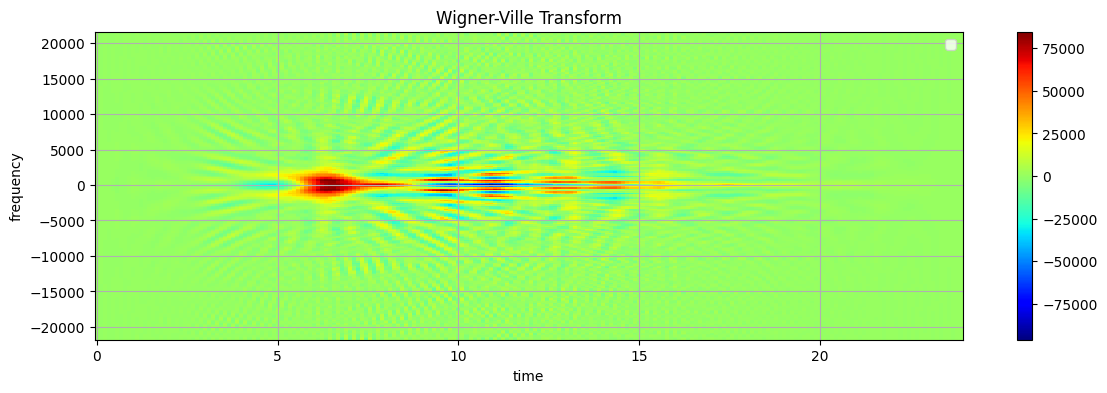

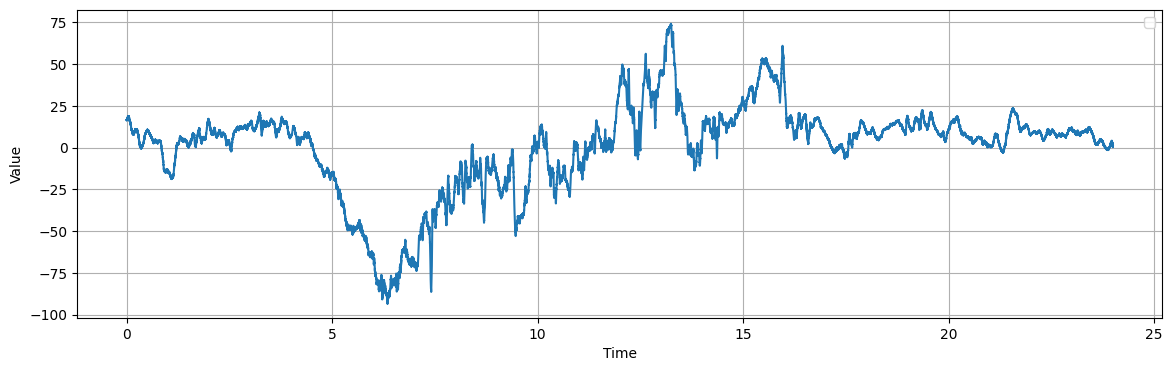

In [ ]:
# STFT_window = 2**7
# f_stft, t_stft, Zxx = sig.stft(signal, freq_s,
#                                nperseg=STFT_window,
#                                noverlap=STFT_window // 2,
#                                return_onesided=True)

# Zxx = np.fft.fftshift(Zxx, axes=0)
# f_stft = np.fft.fftshift(f_stft)

wvd = tftb.processing.WignerVilleDistribution(signal, timestamps=domain)
tfr_wvd, t_wvd, f_wvd = wvd.run()

plt.figure(figsize=myfigsize)
df1 = f_stft[1] - f_stft[0]  # the frequency step

# because of how they implemented WVT, the maximum frequency is half of
# the sampling Nyquist frequency, so 125 Hz instead of 250 Hz, and the sampling
# is 2 * dt instead of dt
plt.figure(figsize=myfigsize)
f_wvd = np.fft.fftshift(np.fft.fftfreq(tfr_wvd.shape[0], d=2 * dt))
df_wvd = f_wvd[1]-f_wvd[0]  # the frequency step in the WVT
plt.pcolormesh(np.linspace(domain[0] - dt/2, domain[-1] + dt/2, tfr_wvd.shape[1]), np.linspace(f_wvd[0] - df_wvd/2, f_wvd[-1] + df_wvd/2, tfr_wvd.shape[0]), np.fft.fftshift(tfr_wvd, axes=0), shading='auto', cmap='jet')
plt.colorbar()
plot_setup(
        xlabel='time',
        ylabel='frequency',
        title='Wigner-Ville Transform'
)

plt.figure(figsize=myfigsize)
plt.plot(df.Time, df.y_centered)
plot_setup()